In [2]:
#Importing the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib
%matplotlib inline

#Importing the warnings
import warnings
warnings.filterwarnings("ignore")

In [3]:
#Checking the vesion
print('The Pandas version is {}.'.format(pd.__version__))
print('The Numpy version is {}.'.format(np.__version__))
print('The Matplotlib version is {}.'.format(matplotlib.__version__))
print('The Seaborn version is {}.'.format(sns.__version__))

The Pandas version is 1.1.3.
The Numpy version is 1.18.5.
The Matplotlib version is 2.2.2.
The Seaborn version is 0.9.0.


In [4]:
#Display all the columns and rows
pd.set_option('display.max_columns',None)
pd.set_option('display.max_rows',None)

In [5]:
#Loading the train data
train = pd.read_csv(r"C:\Users\HP\Desktop\Internship\Project\NLP\Malignant Comments Classifier Project\train.csv")
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0


In [6]:
#Loading the test data
test = pd.read_csv(r"C:\Users\HP\Desktop\Internship\Project\NLP\Malignant Comments Classifier Project\test.csv")
test.head()

,id,comment_text
0,00001cee341fdb12,Yo bitch Ja Rule is more succesful then you'll...
1,0000247867823ef7,== From RfC == \n\n The title is fine as it is...
2,00013b17ad220c46,""" \n\n == Sources == \n\n * Zawe Ashton on Lap..."
3,00017563c3f7919a,":If you have a look back at the source, the in..."
4,00017695ad8997eb,I don't anonymously edit articles at all.


In [7]:
#Checking the shape of the train dataset
print("There are {} observation and {} features in train dataset.\n".format(train.shape[0],train.shape[1]))

There are 159571 observation and 8 features in train dataset.



In [8]:
#Checking the number of unique comments
print("There are {} unique comments in this dataset such as: \n\n{}...".format(len(train.comment_text.unique()),
                                                                           "\n\n".join(train.comment_text.unique()[0:1])))

There are 159571 unique comments in this dataset such as: 

Explanation
Why the edits made under my username Hardcore Metallica Fan were reverted? They weren't vandalisms, just closure on some GAs after I voted at New York Dolls FAC. And please don't remove the template from the talk page since I'm retired now.89.205.38.27...


In [9]:
#Checking the inormation of the dataset
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159571 entries, 0 to 159570
Data columns (total 8 columns):
 #   Column            Non-Null Count   Dtype 
---  ------            --------------   ----- 
 0   id                159571 non-null  object
 1   comment_text      159571 non-null  object
 2   malignant         159571 non-null  int64 
 3   highly_malignant  159571 non-null  int64 
 4   rude              159571 non-null  int64 
 5   threat            159571 non-null  int64 
 6   abuse             159571 non-null  int64 
 7   loathe            159571 non-null  int64 
dtypes: int64(6), object(2)
memory usage: 9.7+ MB


Observation: 

        1-Information shows that there are no null values present in our dataset.
        2-ID and Comment_text feature is only object datatype and rest all the features are integer datatype. 

### Checking the Missing Values

In [10]:
#Checking the missing values in the dataset
train.isnull().values.any()

False

In [11]:
#Checking the missing values in columns
train.isnull().sum()

id                  0
comment_text        0
malignant           0
highly_malignant    0
rude                0
threat              0
abuse               0
loathe              0
dtype: int64

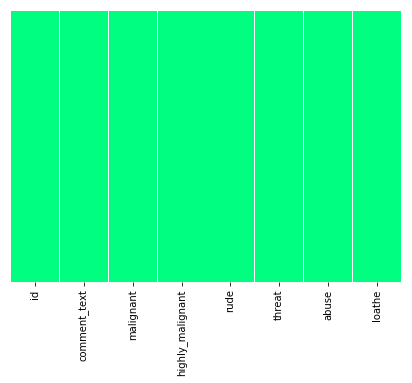

In [12]:
#Seeing the missing values via visualization
plt.figure(figsize=(7,5))
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='winter_r',)
plt.show()

Observation:

    There are no missing values in our train dataset.So to visualize the missing number in bar plot we have to
    import the missingno as mnso.

<Figure size 432x288 with 0 Axes>

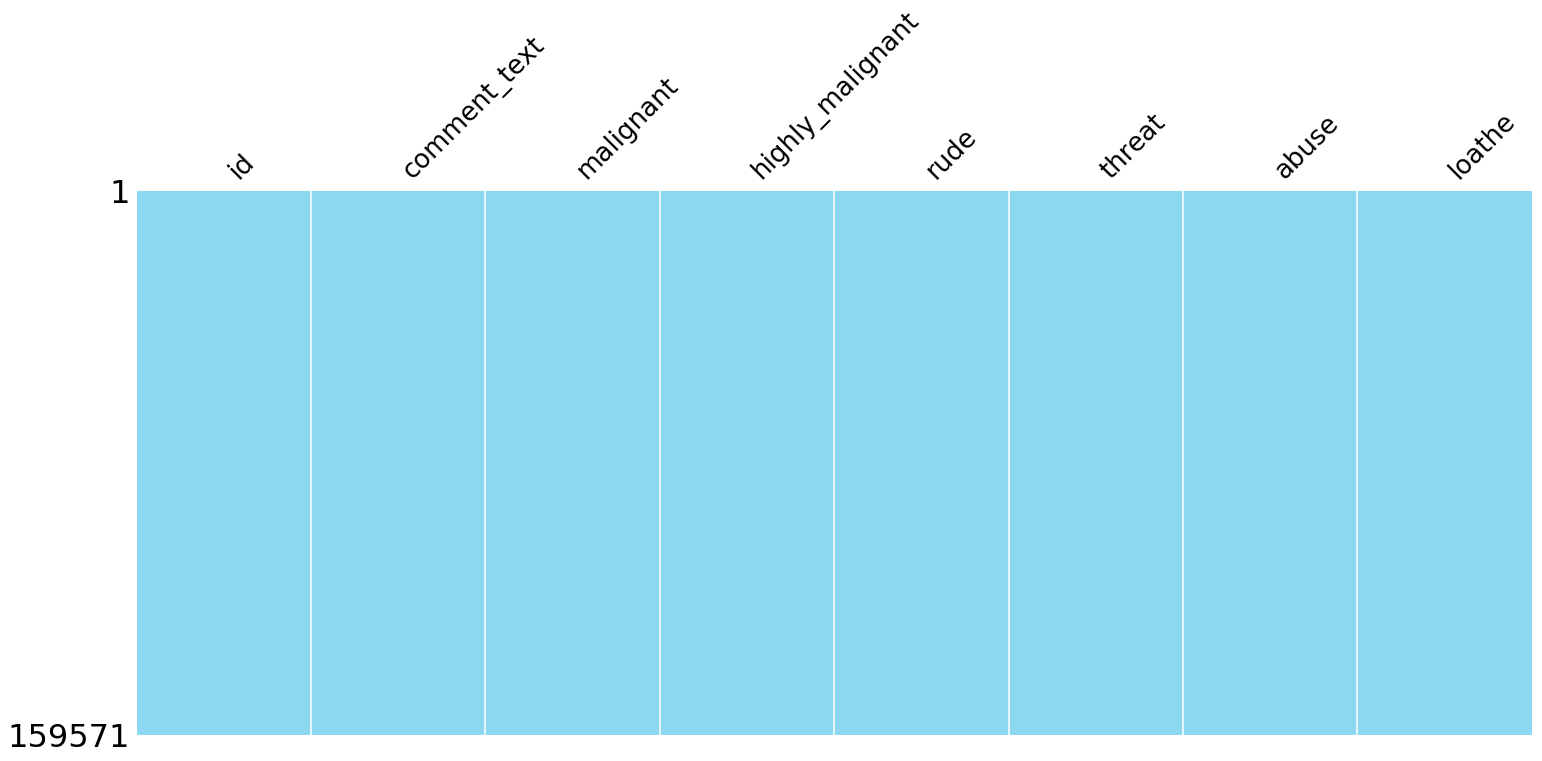

In [13]:
# Plotting the Missing value matrix
import missingno as mnso
plt.figure(figsize=(6,4))
mnso.matrix(train,color=(0.55, 0.85, 0.95),fontsize=26,sparkline=False)

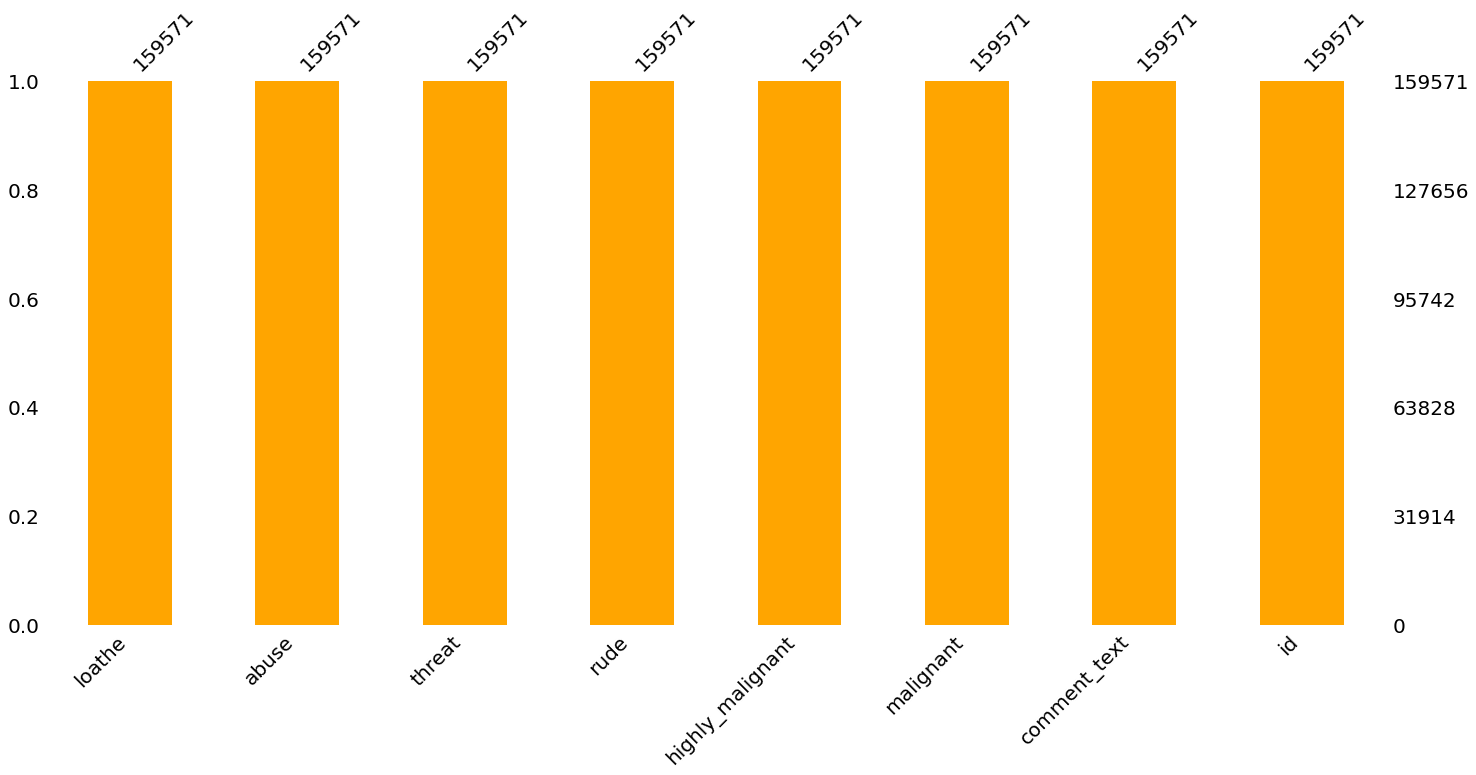

In [14]:
# Plotting the barplot of the null values.
import missingno as mnso
plt.figure(figsize=(12,6))
mnso.bar(train, fontsize=20,color='orange',sort='descending')

#### Findings: There are no null values in our train dataset.

In [15]:
#Checking the number of unique comments
print("There are {} unique comments in this dataset".format(train.comment_text.nunique()))

There are 159571 unique comments in this dataset


### Summary Statistics

In [16]:
# Summary Statistics
print("Summary Statistics of the train data:")
train.describe()

Summary Statistics of the train data:


,malignant,highly_malignant,rude,threat,abuse,loathe
count,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000,159571.000000
mean,0.095844,0.009996,0.052948,0.002996,0.049364,0.008805
std,0.294379,0.099477,0.223931,0.054650,0.216627,0.093420
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [17]:
# Checking the summary of object columns
train.describe(include=['object'])

,id,comment_text
count,159571,159571
unique,159571,159571
top,3df58d6b38c2d838,"I'm not preapred for that right now, 13 januar..."
freq,1,1


Observation:
    
    1-There are 159571 comments in our comment_text column and all are unique. There are no duplicate data present in the
      dataset.
    2-There are six label columns according to the comment type. In future we transform all these six features into single 
      feature.

In [18]:
#Printing the object data types and their unique values

for column in train.columns:
    if train[column].dtype==object:
        print("Seeing the Object features\n")
        print(str(column) + ' : ' + str(train[column].nunique()))
        print('*********************************************************') 
    if train[column].dtype=='int64':
        print("Seeing the Interger features\n")
        print(str(column) + ' : ' + str(train[column].nunique()))
        print("Unique Values:",train[column].unique())
        print('**********************************************************')

Seeing the Object features

id : 159571
*********************************************************
Seeing the Object features

comment_text : 159571
*********************************************************
Seeing the Interger features

malignant : 2
Unique Values: [0 1]
**********************************************************
Seeing the Interger features

highly_malignant : 2
Unique Values: [0 1]
**********************************************************
Seeing the Interger features

rude : 2
Unique Values: [0 1]
**********************************************************
Seeing the Interger features

threat : 2
Unique Values: [0 1]
**********************************************************
Seeing the Interger features

abuse : 2
Unique Values: [0 1]
**********************************************************
Seeing the Interger features

loathe : 2
Unique Values: [0 1]
**********************************************************


### To Check the Correlation

In [19]:
#Seeing the correlation
train.corr()

,malignant,highly_malignant,rude,threat,abuse,loathe
malignant,1.000000,0.308619,0.676515,0.157058,0.647518,0.266009
highly_malignant,0.308619,1.000000,0.403014,0.123601,0.375807,0.201600
rude,0.676515,0.403014,1.000000,0.141179,0.741272,0.286867
threat,0.157058,0.123601,0.141179,1.000000,0.150022,0.115128
abuse,0.647518,0.375807,0.741272,0.150022,1.000000,0.337736
loathe,0.266009,0.201600,0.286867,0.115128,0.337736,1.000000


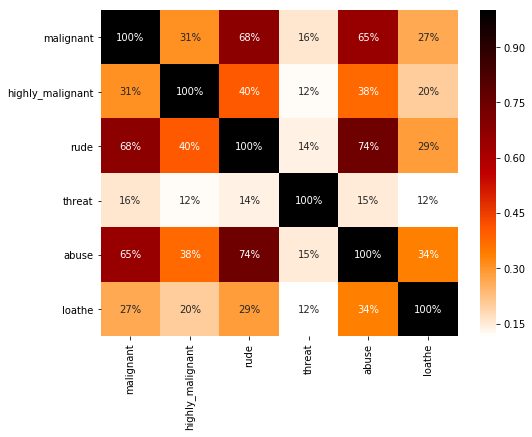

In [20]:
#Seeing the correlation via visualization
plt.figure(figsize=(8,6))
sns.heatmap(train.corr(),annot=True,fmt='.0%',cmap='gist_heat_r')
plt.show()

<Figure size 1440x576 with 0 Axes>

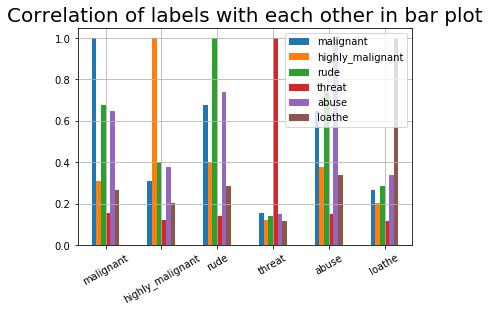

In [21]:
#Checking the correlation of labels in bar plot
plt.figure(figsize=(20,8))
train.corr(method='pearson').plot(kind='bar',grid=True)
plt.xticks(rotation='30')
plt.title("Correlation of labels with each other in bar plot",fontsize=20)
plt.show()

Counting of labels for: malignant
0    144277
1     15294
Name: malignant, dtype: int64 



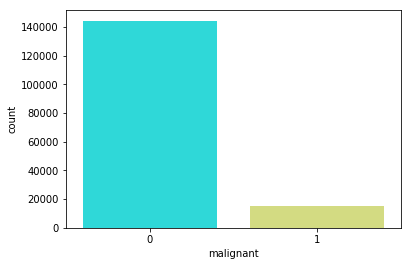

Counting of labels for: highly_malignant
0    157976
1      1595
Name: highly_malignant, dtype: int64 



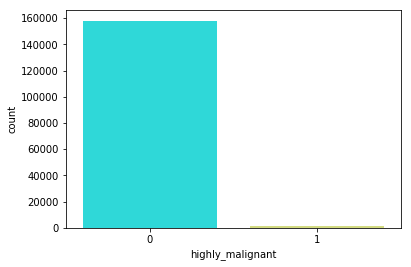

Counting of labels for: loathe
0    158166
1      1405
Name: loathe, dtype: int64 



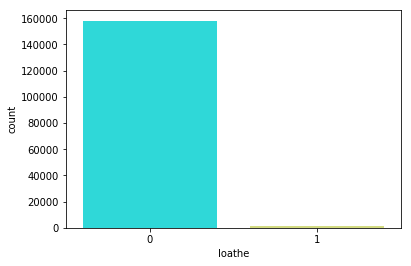

Counting of labels for: rude
0    151122
1      8449
Name: rude, dtype: int64 



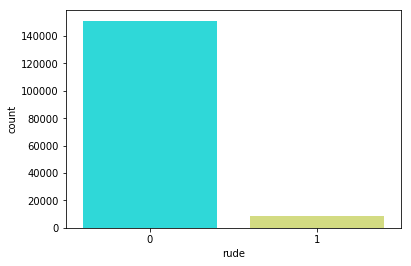

Counting of labels for: abuse
0    151694
1      7877
Name: abuse, dtype: int64 



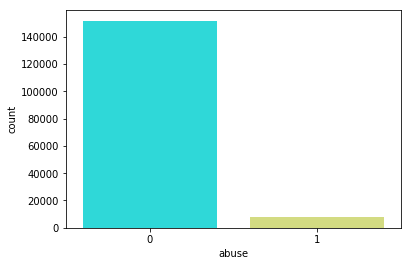

Counting of labels for: threat
0    159093
1       478
Name: threat, dtype: int64 



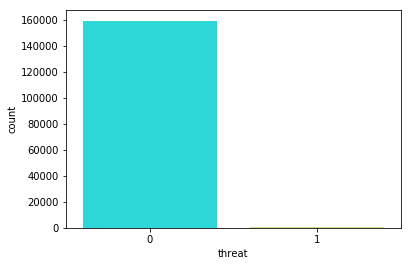

In [22]:
col=['malignant','highly_malignant','loathe','rude','abuse','threat']
for i in col:
    print("Counting of labels for:", i)
    sns.countplot(train[i],palette='rainbow',saturation=0.95)
    print(train[i].value_counts(),'\n')
    plt.show()

Here we see the counting of values in each labels with their plot.

### Creating new target feature that is combination o all target features 

In [23]:
target_cols = ['malignant','highly_malignant','rude','threat','abuse','loathe']

In [24]:
train[target_cols].sum()

malignant           15294
highly_malignant     1595
rude                 8449
threat                478
abuse                7877
loathe               1405
dtype: int64

In [25]:
target_label = train[target_cols]
train['label'] = train[target_cols].sum(axis=1)

In [26]:
train.head(10)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,4
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,0


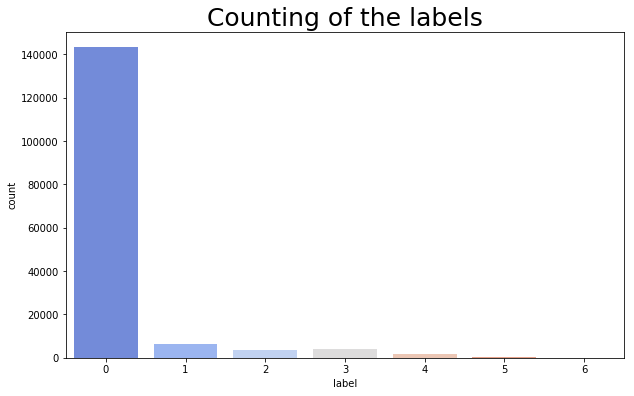

In [27]:
#Checking the counting of labels
plt.figure(figsize=(10,6))
sns.countplot(train['label'], palette='coolwarm')
plt.title('Counting of the labels',fontsize=25)
plt.show()

In [28]:
train['label'].value_counts()

0    143346
1      6360
3      4209
2      3480
4      1760
5       385
6        31
Name: label, dtype: int64

### Scaling the target feature that is label 

In [29]:
train['label'] = train['label'] >0
train['label'] = train['label'].astype(int)

In [30]:
train.head(15)

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0
5,00025465d4725e87,"""\n\nCongratulations from me as well, use the ...",0,0,0,0,0,0,0
6,0002bcb3da6cb337,COCKSUCKER BEFORE YOU PISS AROUND ON MY WORK,1,1,1,0,1,0,1
7,00031b1e95af7921,Your vandalism to the Matt Shirvington article...,0,0,0,0,0,0,0
8,00037261f536c51d,Sorry if the word 'nonsense' was offensive to ...,0,0,0,0,0,0,0
9,00040093b2687caa,alignment on this subject and which are contra...,0,0,0,0,0,0,0


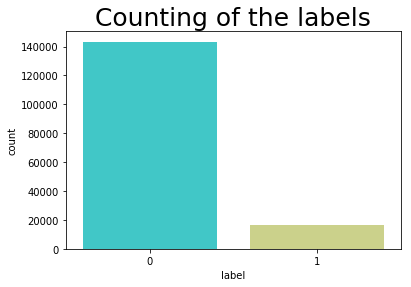

In [31]:
#Checking the counting of labels
#plt.figure(figsize=(10,6))
sns.countplot(train['label'], palette='rainbow')
plt.title('Counting of the labels',fontsize=25)
plt.show()

In [32]:
train['label'].value_counts()

0    143346
1     16225
Name: label, dtype: int64

In [33]:
# Creating the new column before cleaning the comment_text column
train['comment_length'] = train['comment_text'].str.len()
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,comment_length
0,0000997932d777bf,Explanation\nWhy the edits made under my usern...,0,0,0,0,0,0,0,264
1,000103f0d9cfb60f,D'aww! He matches this background colour I'm s...,0,0,0,0,0,0,0,112
2,000113f07ec002fd,"Hey man, I'm really not trying to edit war. It...",0,0,0,0,0,0,0,233
3,0001b41b1c6bb37e,"""\nMore\nI can't make any real suggestions on ...",0,0,0,0,0,0,0,622
4,0001d958c54c6e35,"You, sir, are my hero. Any chance you remember...",0,0,0,0,0,0,0,67


## Data Cleaning Steps for comment_text column

* Remove HTML tags

* Remove special characters

* Convert everything to lowercase

* Remove stopwords

* Lemmatization

In [34]:
import nltk
import string
from nltk.corpus import stopwords

print('The NLTK version is {}'.format(nltk.__version__))

The NLTK version is 3.3


In [35]:
# 1-Removing the HTML tags
# Regex rule : "<.*?>"

import re

def clean(text):
    cleaned = re.compile(r"<.*?>")
    return re.sub(cleaned," ",text)

train.comment_text = train.comment_text.apply(clean)
train.comment_text[1]

"D'aww! He matches this background colour I'm seemingly stuck with. Thanks.  (talk) 21:51, January 11, 2016 (UTC)"

In [36]:
# 2- Removing special character like punctuation
# We can use string.punctuation or manually

def is_special(text):
    empty = ''
    for i in text:
        if i.isalpha():
            empty = empty + i
        else:
            empty = empty + ' '
    return empty

train.comment_text = train.comment_text.apply(is_special)
train.comment_text[1]

'D aww  He matches this background colour I m seemingly stuck with  Thanks    talk         January           UTC '

In [37]:
# 3-Converting everything to lowercase

def lower(text):
    return text.lower()

train.comment_text = train.comment_text.apply(lower)
train.comment_text[1]

'd aww  he matches this background colour i m seemingly stuck with  thanks    talk         january           utc '

In [38]:
# 4-Removing the stopwords
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

def remove_stopwords(text):
    stop_words = set(stopwords.words('english') + ['u', 'ü', 'ur', '4', '2', 'im', 'dont', 'doin', 'ure','yo','Ja'])
    words = word_tokenize(text)
    return [w for w in words if w not in stop_words]

train.comment_text = train.comment_text.apply(remove_stopwords)
train.comment_text[1]

['aww',
 'matches',
 'background',
 'colour',
 'seemingly',
 'stuck',
 'thanks',
 'talk',
 'january',
 'utc']

In [39]:
# 5-Lemmatization
from nltk.stem import WordNetLemmatizer

def lema_text(text):
    lema = WordNetLemmatizer()
    return " ".join([lema.lemmatize(w) for w in text])

train.comment_text = train.comment_text.apply(lema_text)
train.comment_text[1]

'aww match background colour seemingly stuck thanks talk january utc'

In [40]:
# Creating new column (cleaned_text) after removing puncuations,stopwords from news column to check how much data is cleaned
train['cleaned_text'] = train.comment_text.str.len()
train.head()

,id,comment_text,malignant,highly_malignant,rude,threat,abuse,loathe,label,comment_length,cleaned_text
0,0000997932d777bf,explanation edits made username hardcore metal...,0,0,0,0,0,0,0,264,156
1,000103f0d9cfb60f,aww match background colour seemingly stuck th...,0,0,0,0,0,0,0,112,67
2,000113f07ec002fd,hey man really trying edit war guy constantly ...,0,0,0,0,0,0,0,233,141
3,0001b41b1c6bb37e,make real suggestion improvement wondered sect...,0,0,0,0,0,0,0,622,364
4,0001d958c54c6e35,sir hero chance remember page,0,0,0,0,0,0,0,67,29


In [41]:
# Total length removal
print("Origional Length:",train.comment_length.sum())
print("Cleaned Length:",train.cleaned_text.sum())
print("Total Words Removed:",(train.comment_length.sum()) - (train.cleaned_text.sum()))

Origional Length: 62893130
Cleaned Length: 38788758
Total Words Removed: 24104372


#### Observation: Here we see the origional length of our comment_text column and cleaned length of our comment_text columns and their difference means how much data is cleaned.

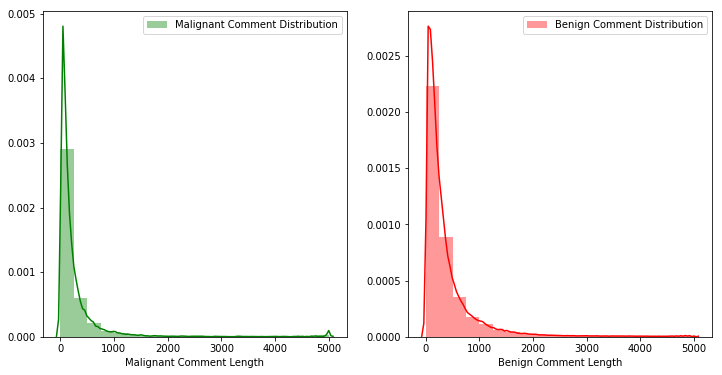

In [42]:
#Plotting the distribution of comment beore cleaning the comment_text column
f,ax = plt.subplots(1,2,figsize=(12,6))

sns.distplot(train[train['label']==1]['comment_length'],bins=20, ax=ax[0],label='Malignant Comment Distribution',color='g')
ax[0].set_xlabel('Malignant Comment Length')
ax[0].legend()

sns.distplot(train[train['label']==0]['comment_length'],bins=20, ax=ax[1],label='Benign Comment Distribution',color='r')
ax[1].set_xlabel('Benign Comment Length')
ax[1].legend()

plt.show()

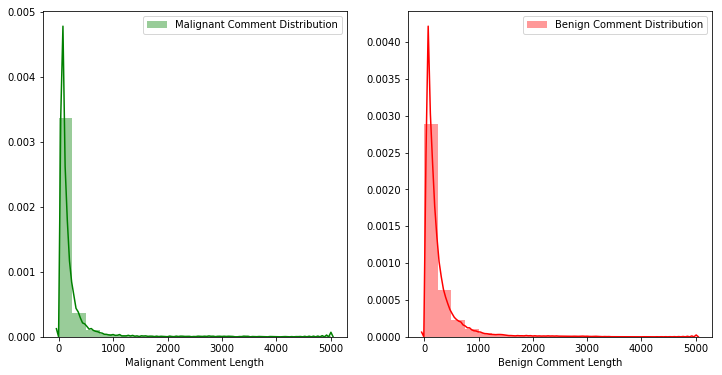

In [43]:
#Plotting the distribution of comment after cleaning the comment_text column
f,ax = plt.subplots(1,2,figsize=(12,6))

sns.distplot(train[train['label']==1]['cleaned_text'],bins=20, ax=ax[0],label='Malignant Comment Distribution',color='g')
ax[0].set_xlabel('Malignant Comment Length')
ax[0].legend()

sns.distplot(train[train['label']==0]['cleaned_text'],bins=20, ax=ax[1],label='Benign Comment Distribution',color='r')
ax[1].set_xlabel('Benign Comment Length')
ax[1].legend()

plt.show()

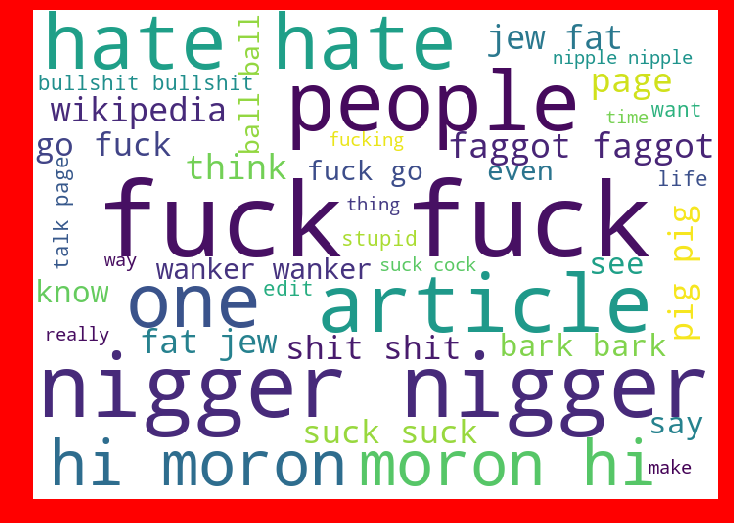

In [44]:
#Getting sense of loud words for Malignant Comments in label column

from wordcloud import WordCloud


spams = train['comment_text'][train['label']==1]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=40).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

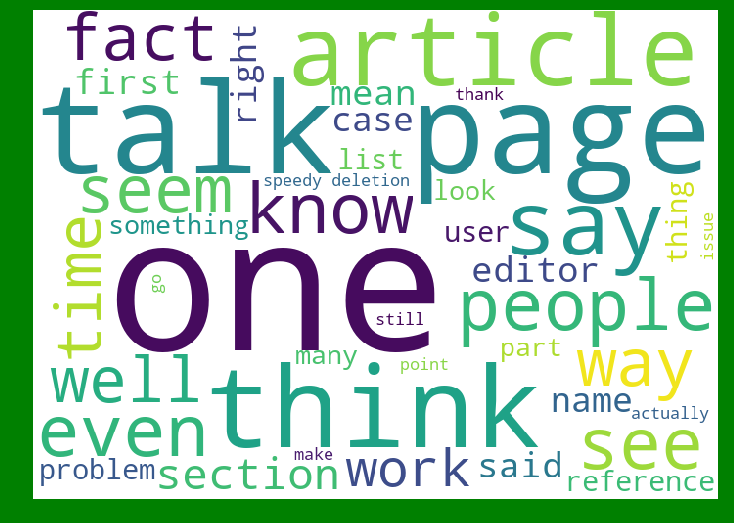

In [45]:
#Getting sense of loud words for Benign Comments in label column

from wordcloud import WordCloud


spams = train['comment_text'][train['label']==0]

spam_cloud = WordCloud(width=700,height=500,background_color='white',max_words=40).generate(' '.join(spams))

plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

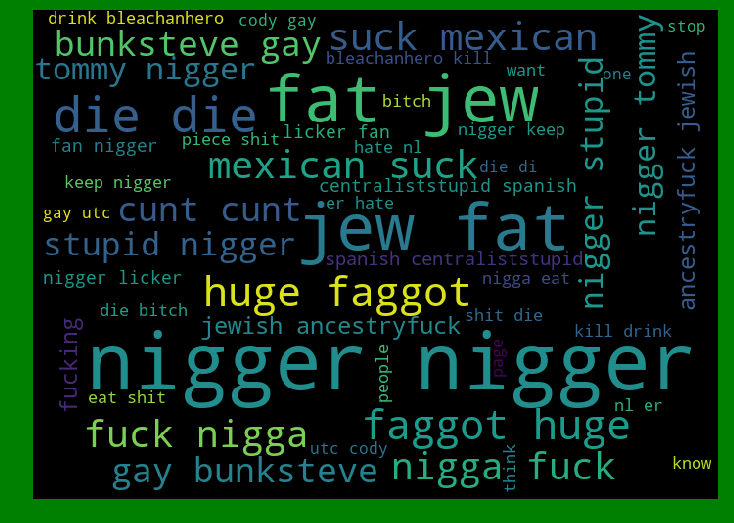

In [46]:
#Getting sense of loud words which are offensive for loathe label

offensive = train['comment_text'][train['loathe']==1]
spam_cloud = WordCloud(width=700,height=500,background_color='black',max_words=50).generate(' '.join(offensive))
plt.figure(figsize=(10,8),facecolor='g')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

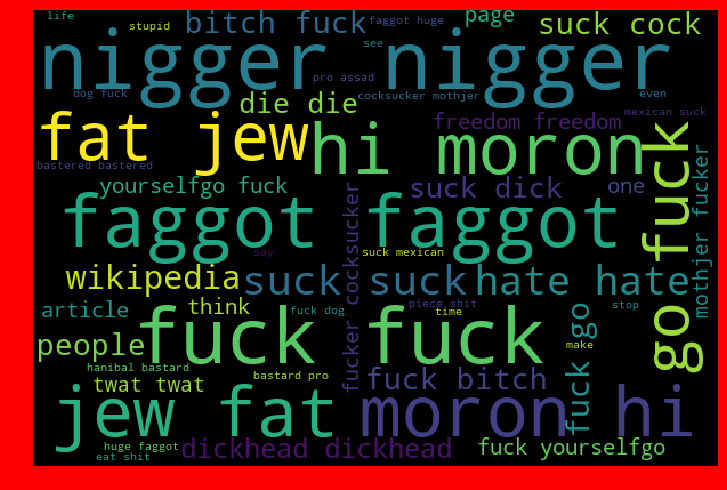

In [47]:
#Getting sense of loud words which are offensive for abuse label

offensive = train['comment_text'][train['abuse']==1]
spam_cloud = WordCloud(width=600,height=400,background_color='black',max_words=50).generate(' '.join(offensive))
plt.figure(figsize=(10,8),facecolor='r')
plt.imshow(spam_cloud)
plt.axis('off')
plt.tight_layout(pad=0)
plt.show()

#### We can also see others labels same way.

## Converting the text into vectors using TF-IDF Vectorizer

In [48]:
# Importing the library and converting it into vectors
from sklearn.feature_extraction.text import TfidfVectorizer
tf_vec = TfidfVectorizer(max_features = 15000, stop_words='english')

In [56]:
#Independent Features
X = tf_vec.fit_transform(train['comment_text'])

In [57]:
#Dependent Feature
y = train['label']

In [58]:
#Checking the distribution of the labels
print("Count of Benign and Malignant Comments:\n",train.label.value_counts())

Count of Benign and Malignant Comments:
 0    143346
1     16225
Name: label, dtype: int64


In [59]:
#Checking the distribution of the labels  percentage wise.
train['label'].value_counts(normalize=True) *100

0    89.832112
1    10.167888
Name: label, dtype: float64

Observation:

    After seeing the label column which is also our target feature for this dataset it is clearly shown that 89.83% of
    data is label 0 and only 10.16% of data is label 1 so our dataset is implanced. So before making the ML model first we
    have to do sampling to get rid off imblance dataset.

## Model Training

In [60]:
#checking the shape of input and target variable
print(X.shape,'\t\t',y.shape)

(159571, 15000) 		 (159571,)


In [61]:
#Splitting the data into training and testing data

from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(X,y,test_size=.25,random_state=42,stratify=y)

In [62]:
#Checking the shape

print(x_train.shape,'\t\t',x_test.shape)

(119678, 15000) 		 (39893, 15000)


In [63]:
#Checking the shape

print(y_train.shape,'\t',y_test.shape)

(119678,) 	 (39893,)


## Logistic Regression
### Cross Validation like KFold and Hyperparameter tunning

In [64]:
# Importing the model library
from sklearn.linear_model import LogisticRegression

#Importing the error metrics
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV, KFold

In [65]:
log_class=LogisticRegression()
grid={'C':10*np.arange(-2,3),'penalty':['l1','l2']}
cv=KFold(n_splits=15,random_state=None,shuffle=False)

In [66]:
clf=GridSearchCV(log_class,grid,cv=cv,n_jobs=-1,scoring='f1_macro')
clf.fit(x_train,y_train)

GridSearchCV(cv=KFold(n_splits=15, random_state=None, shuffle=False),
             estimator=LogisticRegression(), n_jobs=-1,
             param_grid={'C': array([-20, -10,   0,  10,  20]),
                         'penalty': ['l1', 'l2']},
             scoring='f1_macro')

In [67]:
y_pred_train = clf.predict(x_train)
print('Training accuracy is {}\n'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test=clf.predict(x_test)
print('Test accuracy is {}\n'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9733702100636709

Test accuracy is 0.9585641591256612

[[35370   467]
 [ 1186  2870]]
              precision    recall  f1-score   support

           0       0.97      0.99      0.98     35837
           1       0.86      0.71      0.78      4056

    accuracy                           0.96     39893
   macro avg       0.91      0.85      0.88     39893
weighted avg       0.96      0.96      0.96     39893



### DecisionTreeClassifeir

In [68]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)

DecisionTreeClassifier()

In [69]:
y_pred_train = dtc.predict(x_train)
print('Training accuracy is {}\n'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test=dtc.predict(x_test)
print('Test accuracy is {}\n'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9990223767108407

Test accuracy is 0.9401649412177575

[[34690  1147]
 [ 1240  2816]]
              precision    recall  f1-score   support

           0       0.97      0.97      0.97     35837
           1       0.71      0.69      0.70      4056

    accuracy                           0.94     39893
   macro avg       0.84      0.83      0.83     39893
weighted avg       0.94      0.94      0.94     39893



### Random Forest Classifier

In [78]:
from sklearn.ensemble import RandomForestClassifier
classifier = RandomForestClassifier()
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [79]:
y_pred_train = classifier.predict(x_train)
print('Training accuracy is {}\n'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test=classifier.predict(x_test)
print('Test accuracy is {}\n'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9997851368409744

Test accuracy is 0.9521014371657754

[[42803   201]
 [ 2092  2776]]
              precision    recall  f1-score   support

           0       0.95      1.00      0.97     43004
           1       0.93      0.57      0.71      4868

    accuracy                           0.95     47872
   macro avg       0.94      0.78      0.84     47872
weighted avg       0.95      0.95      0.95     47872



### XGBoost Classifier

In [84]:
from xgboost import XGBClassifier
xgb = XGBClassifier()
xgb.fit(x_train,y_train)

[21:12:48] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.3.0/src/learner.cc:1061: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=4, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [85]:
y_pred_train = xgb.predict(x_train)
print('Training accuracy is {}\n'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test=xgb.predict(x_test)
print('Test accuracy is {}\n'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9635717419135355

Test accuracy is 0.9533130013368984

[[42686   318]
 [ 1917  2951]]
              precision    recall  f1-score   support

           0       0.96      0.99      0.97     43004
           1       0.90      0.61      0.73      4868

    accuracy                           0.95     47872
   macro avg       0.93      0.80      0.85     47872
weighted avg       0.95      0.95      0.95     47872



### Now we use Sampling techniques to balance our dataset and then apply some models and see the result

## Under Sampling

#### By using the under sampling we are trying to reduce the points of maximum labels.

In [72]:
from collections import Counter
Counter(y_train)

Counter({0: 107509, 1: 12169})

In [63]:
# Importing the Undersampling library
from imblearn.under_sampling import NearMiss

ns = NearMiss(.8)
x_train_ns,y_train_ns = ns.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

The number of classes before fit Counter({0: 100342, 1: 11357})
The number of classes after fit Counter({0: 14196, 1: 11357})


### Using XGBoost with Undersampled data

In [64]:
from xgboost import XGBClassifier
xgb_us = XGBClassifier()
xgb_us.fit(x_train_ns,y_train_ns)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.300000012, max_delta_step=0, max_depth=6,
              min_child_weight=1, missing=nan, monotone_constraints='()',
              n_estimators=100, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [65]:
y_pred_train = xgb_us.predict(x_train_ns)
print('Training accuracy is {}\n'.format(accuracy_score(y_train_ns, y_pred_train)))
y_pred_test=xgb_us.predict(x_test)
print('Test accuracy is {}\n'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9049818025280789

Test accuracy is 0.9103024732620321

[[39834  3170]
 [ 1124  3744]]
              precision    recall  f1-score   support

           0       0.97      0.93      0.95     43004
           1       0.54      0.77      0.64      4868

    accuracy                           0.91     47872
   macro avg       0.76      0.85      0.79     47872
weighted avg       0.93      0.91      0.92     47872



#### From the above result we can clearly see that our under sampled model gives very poor result. So don't use under sampling unless, untill our dataset is very samll.

## Over Samping

#### By using the over sampling we are trying to increase the points of minimum labels.

In [73]:
# Importing the Oversampling library
from imblearn.over_sampling import RandomOverSampler

In [74]:
os = RandomOverSampler(0.75)
x_train_os,y_train_os = os.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_os)))

The number of classes before fit Counter({0: 107509, 1: 12169})
The number of classes after fit Counter({0: 107509, 1: 80631})


### Random Forest Classifier

In [68]:
from sklearn.ensemble import RandomForestClassifier
RFclassifier = RandomForestClassifier()
RFclassifier.fit(x_train_os,y_train_os)

RandomForestClassifier()

In [69]:
y_pred_train = RFclassifier.predict(x_train)
print('Training accuracy is {}\n'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test=RFclassifier.predict(x_test)
print('Test accuracy is {}\n'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9997493263144701

Test accuracy is 0.9501169786096256

[[42762   242]
 [ 2146  2722]]
              precision    recall  f1-score   support

           0       0.95      0.99      0.97     43004
           1       0.92      0.56      0.70      4868

    accuracy                           0.95     47872
   macro avg       0.94      0.78      0.83     47872
weighted avg       0.95      0.95      0.94     47872



In [70]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,y_pred_test)
print("AUC_Score:",auc_score)

AUC_Score: 0.7767672449800586


### DecisionTree Classifier

In [72]:
from sklearn.tree import DecisionTreeClassifier
dtc = DecisionTreeClassifier()
dtc.fit(x_train_os,y_train_os)

DecisionTreeClassifier()

In [73]:
y_pred_train = dtc.predict(x_train)
print('Training accuracy is {}\n'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test=dtc.predict(x_test)
print('Test accuracy is {}\n'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9997493263144701

Test accuracy is 0.9312750668449198

[[41077  1927]
 [ 1363  3505]]
              precision    recall  f1-score   support

           0       0.97      0.96      0.96     43004
           1       0.65      0.72      0.68      4868

    accuracy                           0.93     47872
   macro avg       0.81      0.84      0.82     47872
weighted avg       0.94      0.93      0.93     47872



In [74]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,y_pred_test)
print("AUC_Score:",auc_score)

AUC_Score: 0.8375992158953015


### ExtraTrees Classifier

In [ ]:
from sklearn.ensemble import ExtraTreesClassifier
etc = ExtraTreesClassifier()
etc.fit(x_train_os,y_train_os)

In [ ]:
y_pred_train = etc.predict(x_train)
print('Training accuracy is {}\n'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test=etc.predict(x_test)
print('Test accuracy is {}\n'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

In [ ]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,y_pred_test)
print("AUC_Score:",auc_score)

### Bagging Classifier

In [ ]:
from sklearn.ensemble import BaggingClassifier
bc = BaggingClassifier()
bc.fit(x_train_os,y_train_os)

In [ ]:
y_pred_train = bc.predict(x_train)
print('Training accuracy is {}\n'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test=bc.predict(x_test)
print('Test accuracy is {}\n'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

In [ ]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,y_pred_test)
print("AUC_Score:",auc_score)

### XGBoost Classifier

In [70]:
from xgboost import XGBClassifier
XGBClassifier()

XGBClassifier(base_score=None, booster=None, colsample_bylevel=None,
              colsample_bynode=None, colsample_bytree=None, gamma=None,
              gpu_id=None, importance_type='gain', interaction_constraints=None,
              learning_rate=None, max_delta_step=None, max_depth=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              n_estimators=100, n_jobs=None, num_parallel_tree=None,
              random_state=None, reg_alpha=None, reg_lambda=None,
              scale_pos_weight=None, subsample=None, tree_method=None,
              validate_parameters=None, verbosity=None)

In [75]:
xgb = XGBClassifier(max_depth=15,
                    subsample= 0.8,
                    n_estimators=400,
                    learning_rate=0.01,
                    min_child_weight=10,
                    reg_alpha=0,
                    reg_lambda=5)
xgb.fit(x_train_os,y_train_os)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0, gpu_id=-1,
              importance_type='gain', interaction_constraints='',
              learning_rate=0.01, max_delta_step=0, max_depth=15,
              min_child_weight=10, missing=nan, monotone_constraints='()',
              n_estimators=400, n_jobs=0, num_parallel_tree=1, random_state=0,
              reg_alpha=0, reg_lambda=5, scale_pos_weight=1, subsample=0.8,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [76]:
y_pred_train = xgb.predict(x_train)
print('Training accuracy is {}\n'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test=xgb.predict(x_test)
print('Test accuracy is {}\n'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

Training accuracy is 0.9519878340212905

Test accuracy is 0.9456044920161432

[[35097   740]
 [ 1430  2626]]
              precision    recall  f1-score   support

           0       0.96      0.98      0.97     35837
           1       0.78      0.65      0.71      4056

    accuracy                           0.95     39893
   macro avg       0.87      0.81      0.84     39893
weighted avg       0.94      0.95      0.94     39893



In [77]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,y_pred_test)
print("AUC_Score:",auc_score)

AUC_Score: 0.8133934237856162


#### The AUC Score,f1-score and recall value is high when we use XGBoost with over sampling data. So we choose XGBoost model with over sampled data as our best model among all models.

##### If we use GridSearchCV  or RandomizeSearchCV then our models gives better result but this dataset is too large that's why my system takes too much time to give the result. So for that reason I am not going to use GridSearchCV.

## SMOTETomek

##### It is a method of imblearn. SMOTETomek is a hybrid method which uses on under sampling method (Tomek) in with over sampling method (SMOTE).



In [81]:
from imblearn.combine import SMOTETomek

In [82]:
st = SMOTETomek(0.75)
x_train_st,y_train_st = st.fit_sample(x_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_st)))

The number of classes before fit Counter({0: 100342, 1: 11357})
The number of classes after fit Counter({0: 100328, 1: 75242})


### Using XGBoostClassifier

In [ ]:
from xgboost import XGBClassifier
xgbc = XGBClassifier(max_depth=15,
                    subsample= 0.8,
                    n_estimators=400,
                    learning_rate=0.01,
                    min_child_weight=10,
                     random_state = 45,
                    reg_alpha=2,
                    reg_lambda=5)
xgbc.fit(x_train_st,y_train_st)

In [ ]:
y_pred_train = xgbc.predict(x_train)
print('Training accuracy is {}\n'.format(accuracy_score(y_train, y_pred_train)))
y_pred_test=xgbc.predict(x_test)
print('Test accuracy is {}\n'.format(accuracy_score(y_test,y_pred_test)))
print(confusion_matrix(y_test,y_pred_test))
print(classification_report(y_test,y_pred_test))

In [ ]:
from sklearn.metrics import roc_auc_score
auc_score=roc_auc_score(y_test,y_pred_xgbc)
print("AUC_Score:",auc_score)

### The AUC Score,f1-score and recall value is high when we use XGBoost with over sampling data. So we choose XGBoost model with over sampled data as our final model.

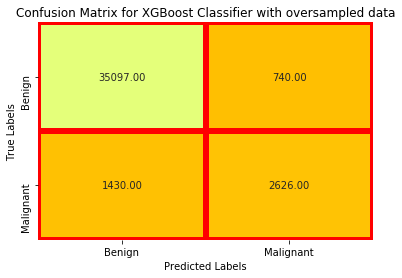

In [78]:
#Plotting Confusion Matrix for XGBoost Classifier with oversampled data.
cm=confusion_matrix(y_test,xgb.predict(x_test))
ax=plt.subplot()
sns.heatmap(cm,annot=True,cbar=False,ax=ax,linewidths=5,linecolor='r',center=0,fmt='.2f',cmap='Wistia_r')
ax.set_xlabel('Predicted Labels');ax.set_ylabel('True Labels')

plt.title("Confusion Matrix for XGBoost Classifier with oversampled data")
ax.xaxis.set_ticklabels(['Benign','Malignant'])
ax.yaxis.set_ticklabels(['Benign','Malignant'])
plt.show()
plt.show()

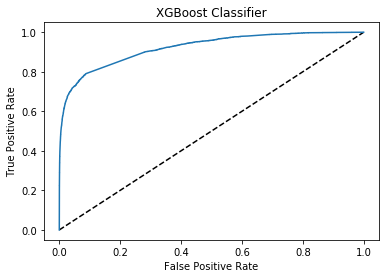

0.8133934237856162


In [79]:
#AUC_ROC Curve of XGBoost Classifier with oversampled data

from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
y_pred_prob=xgb.predict_proba(x_test)[:,1]
fpr,tpr,thredholds=roc_curve(y_test,y_pred_prob)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='XGBoost Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('XGBoost Classifier')
plt.show()

auc_score=roc_auc_score(y_test,xgb.predict(x_test))
print(auc_score)

In [80]:
# Seeing the top 15 features or words  which makes a comment toxic for our best Model.
import eli5
eli5.show_weights(xgb,vec = tf_vec, top = 15)  

Weight,Feature
0.0583,fuck
0.0425,fucking
0.0154,shit
0.0129,suck
0.0126,faggot
0.0112,bitch
0.0108,bastard
0.0108,thank
0.0101,asshole
0.0101,cock


### Model Validation

In [ ]:
#Cleaning steps via calling our function for test data

# 1.Removing HTML tags
test.comment_text = test.comment_text.apply(clean)

#2.Removing Special Characters
test.comment_text = test.comment_text.apply(is_special)

#3.Convert into lower case
test.comment_text = test.comment_text.apply(lower)

#4.Stopwords Removal
test.comment_text = test.comment_text.apply(remove_stopwords)

#5.Lemmatization
test.comment_text = test.comment_text.apply(lema_text)

In [81]:
test_data =tf_vec.fit_transform(test['comment_text'])
test_data

<153164x15000 sparse matrix of type '<class 'numpy.float64'>'
	with 3059650 stored elements in Compressed Sparse Row format>

In [82]:
prediction=xgb.predict(test_data)
prediction

array([0, 0, 0, ..., 0, 0, 0])

### Saving the best model

In [83]:
#Saving the model
import joblib

#Save the model as a pickle in a file
model = joblib.dump(xgb,'Malignant Comment.pkl')
model

['Malignant Comment.pkl']